In [52]:
import numpy as np
import pandas as pd
import os

In [53]:
from google.colab import drive #import g-drive

In [54]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
train_dir = '/content/drive/MyDrive/Dataset/NEU-DET/train'

In [56]:
!pip install -q keras

In [57]:
import keras

In [58]:
train_directory='/content/drive/MyDrive/Dataset/NEU-DET/train/images'
valid_directory='/content/drive/MyDrive/Dataset/NEU-DET/validation/images'
test_directory='/content/drive/MyDrive/Dataset/NEU-DET/test/images'

In [59]:
print("Path Directory:",os.listdir("/content/drive/MyDrive/Dataset/NEU-DET"))

Path Directory: ['validation', 'train', 'test']


In [60]:
print("Training Directory: ",os.listdir("/content/drive/MyDrive/Dataset/NEU-DET/train/images"))
print("Testing Directory: ",os.listdir("/content/drive/MyDrive/Dataset/NEU-DET/test/images"))
print("Validation Directory: ",os.listdir("/content/drive/MyDrive/Dataset/NEU-DET/validation/images"))

Training Directory:  ['inclusion', 'pitted_surface', 'scratches', 'crazing', 'rolled-in_scale', 'patches']
Testing Directory:  ['inclusion', 'crazing', 'scratches', 'rolled-in_scale', 'pitted_surface', 'patches']
Validation Directory:  ['rolled-in_scale', 'crazing', 'pitted_surface', 'scratches', 'patches', 'inclusion']


In [62]:
#For Porosity
#print("Training Porosity data:",len(os.listdir(train_directory+'/'+'porosity')))
#print("Testing Porosity data:",len(os.listdir(test_directory+'/'+'porosity')))
#print("Validation Porosity data:",len(os.listdir(valid_directory+'/'+'porosity')))

#For Pitted
print("Training Pitted data:",len(os.listdir(train_directory+'/'+'pitted_surface')))
print("Testing Pitted data:",len(os.listdir(test_directory+'/'+'pitted_surface')))
print("Validation Pitted data:",len(os.listdir(valid_directory+'/'+'pitted_surface')))

#For Veining
#print("Training Veining data:",len(os.listdir(train_directory+'/'+'veining')))
#print("Testing Veining data:",len(os.listdir(test_directory+'/'+'veining')))
#print("Validation Veining data:",len(os.listdir(valid_directory+'/'+'veining')))

#For Scabs
#print("Training Scabs data:",len(os.listdir(train_directory+'/'+'scabs')))
#print("Testing Scabs data:",len(os.listdir(test_directory+'/'+'scabs')))
#print("Validation Scabs data:",len(os.listdir(valid_directory+'/'+'scabs')))

#For Rolled
print("Training Rolled data:",len(os.listdir(train_directory+'/'+'rolled-in_scale')))
print("Testing Rolled data:",len(os.listdir(test_directory+'/'+'rolled-in_scale')))
print("Validation Rolled data:",len(os.listdir(valid_directory+'/'+'rolled-in_scale')))

#For Scratches
print("Training Scratches data:",len(os.listdir(train_directory+'/'+'scratches')))
print("Testing Scratches data:",len(os.listdir(test_directory+'/'+'scratches')))
print("Validation Scratches data:",len(os.listdir(valid_directory+'/'+'scratches')))

#For Inclusion
print("Training Inclusion data:",len(os.listdir(train_directory+'/'+'inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_directory+'/'+'inclusion')))
print("Validation Inclusion data:",len(os.listdir(valid_directory+'/'+'inclusion')))

#For Patches
print("Training Patches data:",len(os.listdir(train_directory+'/'+'patches')))
print("Testing Patches data:",len(os.listdir(test_directory+'/'+'patches')))
print("Validation Patches data:",len(os.listdir(valid_directory+'/'+'patches')))

#For Crazing
print("Training Crazing data:",len(os.listdir(train_directory+'/'+'crazing')))
print("Testing Crazing data:",len(os.listdir(test_directory+'/'+'crazing')))
print("Validation Crazing data:",len(os.listdir(valid_directory+'/'+'crazing')))


Training Pitted data: 240
Testing Pitted data: 6
Validation Pitted data: 60
Training Rolled data: 240
Testing Rolled data: 6
Validation Rolled data: 60
Training Scratches data: 240
Testing Scratches data: 6
Validation Scratches data: 60
Training Inclusion data: 250
Testing Inclusion data: 6
Validation Inclusion data: 60
Training Patches data: 240
Testing Patches data: 6
Validation Patches data: 60
Training Crazing data: 240
Testing Crazing data: 6
Validation Crazing data: 60


In [63]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
train_datagen = ImageDataGenerator(     
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.2,                
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



train_generator = train_datagen.flow_from_directory(batch_size=16,    
                                                     directory=train_directory,   
                                                     shuffle=True,
                                                     target_size=(200,200),
                                                     class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        valid_directory,
        target_size=(200, 200),
        batch_size=16,
        class_mode='categorical')

Found 1450 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [65]:
print (train_datagen)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization



input_shape = (200, 200, 3)
num_classes = 6

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape)) #creating a kernal in order to treat the shape of the image
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',)) #kernel to treat 
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      36928     
                                                      

In [67]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [68]:
tf.keras.optimizers.Adam( #Adam optimizer-involes combination of 2 type of gradient descent Momentum and root mean squared propgation
    learning_rate=0.001,
)

In [69]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [71]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32, 
        epochs=55,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1,shuffle=True)

Epoch 1/55


KeyboardInterrupt: ignored

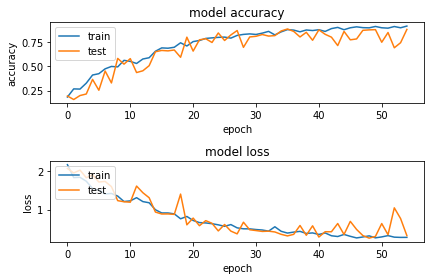

In [ ]:
import matplotlib.pyplot as plt 
fig=plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
fig.tight_layout()

 # summarize history for loss  

plt.subplot(212)  


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
fig.tight_layout()
plt.show()

In [72]:
from sklearn.datasets import load_files
import numpy as np
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_directory)

In [73]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import tensorflow as tf
import tensorflow.keras.utils

In [75]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (36, 200, 200, 3)


In [76]:
x_test.shape

(36, 200, 200, 3)

In [77]:
print(y_test)

[5 3 2 5 3 2 1 0 1 4 4 5 5 4 5 1 2 0 2 2 1 4 0 2 4 4 1 3 0 3 3 3 1 5 0 0]


In [78]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [79]:
from keras.utils import np_utils
y_test_one_encoded = np_utils.to_categorical(y_test,no_of_classes)

In [80]:
x_test

array([[[[145., 145., 145.],
         [147., 147., 147.],
         [145., 145., 145.],
         ...,
         [109., 109., 109.],
         [109., 109., 109.],
         [112., 112., 112.]],

        [[147., 147., 147.],
         [147., 147., 147.],
         [146., 146., 146.],
         ...,
         [111., 111., 111.],
         [110., 110., 110.],
         [109., 109., 109.]],

        [[147., 147., 147.],
         [146., 146., 146.],
         [145., 145., 145.],
         ...,
         [113., 113., 113.],
         [113., 113., 113.],
         [111., 111., 111.]],

        ...,

        [[182., 182., 182.],
         [178., 178., 178.],
         [178., 178., 178.],
         ...,
         [131., 131., 131.],
         [133., 133., 133.],
         [130., 130., 130.]],

        [[183., 183., 183.],
         [180., 180., 180.],
         [182., 182., 182.],
         ...,
         [130., 130., 130.],
         [131., 131., 131.],
         [128., 128., 128.]],

        [[186., 186., 186.],
       

In [81]:
x_test = x_test.astype('float32')/255

In [82]:
x_test

array([[[[0.5686275 , 0.5686275 , 0.5686275 ],
         [0.5764706 , 0.5764706 , 0.5764706 ],
         [0.5686275 , 0.5686275 , 0.5686275 ],
         ...,
         [0.42745098, 0.42745098, 0.42745098],
         [0.42745098, 0.42745098, 0.42745098],
         [0.4392157 , 0.4392157 , 0.4392157 ]],

        [[0.5764706 , 0.5764706 , 0.5764706 ],
         [0.5764706 , 0.5764706 , 0.5764706 ],
         [0.57254905, 0.57254905, 0.57254905],
         ...,
         [0.43529412, 0.43529412, 0.43529412],
         [0.43137255, 0.43137255, 0.43137255],
         [0.42745098, 0.42745098, 0.42745098]],

        [[0.5764706 , 0.5764706 , 0.5764706 ],
         [0.57254905, 0.57254905, 0.57254905],
         [0.5686275 , 0.5686275 , 0.5686275 ],
         ...,
         [0.44313726, 0.44313726, 0.44313726],
         [0.44313726, 0.44313726, 0.44313726],
         [0.43529412, 0.43529412, 0.43529412]],

        ...,

        [[0.7137255 , 0.7137255 , 0.7137255 ],
         [0.69803923, 0.69803923, 0.69803923]

In [83]:
y_pred = model.predict(x_test)

2/2 [==============================] - 4s 441ms/step


In [85]:
print(y_pred)

[[0.16641334 0.1694269  0.16634056 0.16459896 0.16676286 0.16645731]
 [0.16641438 0.16942732 0.16633959 0.16459845 0.16676268 0.16645761]
 [0.16640899 0.16942988 0.16634427 0.16460635 0.16675915 0.1664513 ]
 [0.16641414 0.16942666 0.16633978 0.16459854 0.16676283 0.16645804]
 [0.16640759 0.1694301  0.16634618 0.16460215 0.16676316 0.16645078]
 [0.16641451 0.16943036 0.16633973 0.16459838 0.16676112 0.1664559 ]
 [0.16641414 0.16942666 0.16633978 0.16459854 0.16676283 0.16645804]
 [0.16641487 0.16942716 0.16633919 0.16459812 0.16676338 0.16645725]
 [0.16641414 0.16942666 0.16633978 0.16459854 0.16676283 0.16645804]
 [0.16641414 0.16942666 0.16633978 0.16459854 0.16676283 0.16645804]
 [0.16641182 0.16942681 0.16634229 0.16459963 0.16676335 0.16645592]
 [0.16640829 0.16942166 0.1663468  0.16460402 0.16676266 0.1664566 ]
 [0.16641414 0.16942666 0.16633978 0.16459854 0.16676283 0.16645804]
 [0.16641414 0.16942666 0.16633978 0.16459854 0.16676283 0.16645804]
 [0.16641422 0.16942687 0.1663397 

In [89]:
y_prediction = np.argmax(np.round(y_pred),axis=1)

In [90]:
print(y_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [91]:
test_eval = model.evaluate(x_test,y_test_one_encoded, verbose=0)

In [92]:
x_test

array([[[[0.5686275 , 0.5686275 , 0.5686275 ],
         [0.5764706 , 0.5764706 , 0.5764706 ],
         [0.5686275 , 0.5686275 , 0.5686275 ],
         ...,
         [0.42745098, 0.42745098, 0.42745098],
         [0.42745098, 0.42745098, 0.42745098],
         [0.4392157 , 0.4392157 , 0.4392157 ]],

        [[0.5764706 , 0.5764706 , 0.5764706 ],
         [0.5764706 , 0.5764706 , 0.5764706 ],
         [0.57254905, 0.57254905, 0.57254905],
         ...,
         [0.43529412, 0.43529412, 0.43529412],
         [0.43137255, 0.43137255, 0.43137255],
         [0.42745098, 0.42745098, 0.42745098]],

        [[0.5764706 , 0.5764706 , 0.5764706 ],
         [0.57254905, 0.57254905, 0.57254905],
         [0.5686275 , 0.5686275 , 0.5686275 ],
         ...,
         [0.44313726, 0.44313726, 0.44313726],
         [0.44313726, 0.44313726, 0.44313726],
         [0.43529412, 0.43529412, 0.43529412]],

        ...,

        [[0.7137255 , 0.7137255 , 0.7137255 ],
         [0.69803923, 0.69803923, 0.69803923]

In [93]:
y_test

array([5, 3, 2, 5, 3, 2, 1, 0, 1, 4, 4, 5, 5, 4, 5, 1, 2, 0, 2, 2, 1, 4,
       0, 2, 4, 4, 1, 3, 0, 3, 3, 3, 1, 5, 0, 0])

In [94]:
y_test_one_encoded

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [95]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.791790246963501
Test accuracy: 0.1666666716337204


In [96]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, y_prediction, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.17      1.00      0.29         6
     Class 1       0.00      0.00      0.00         6
     Class 2       0.00      0.00      0.00         6
     Class 3       0.00      0.00      0.00         6
     Class 4       0.00      0.00      0.00         6
     Class 5       0.00      0.00      0.00         6

    accuracy                           0.17        36
   macro avg       0.03      0.17      0.05        36
weighted avg       0.03      0.17      0.05        36



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

matrix = confusion_matrix(y_test, y_prediction)
matrix.diagonal()/matrix.sum(axis=1)

array([1., 0., 0., 0., 0., 0.])

In [98]:
print(matrix)

[[6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]]


In [99]:
class_names = ['class a', 'class b', 'class c', 'class d']

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

class_names=['inclusion', 'scratches', 'patches', 'crazing', 'rolled-in-scale', 'pitted_surface']

fig, ax = plot_confusion_matrix(conf_mat=matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                # ,
                                # class_names=class_names
                                figsize=(7, 7)
                                )
plt.show()

2/2 [==============================] - 3s 236ms/step


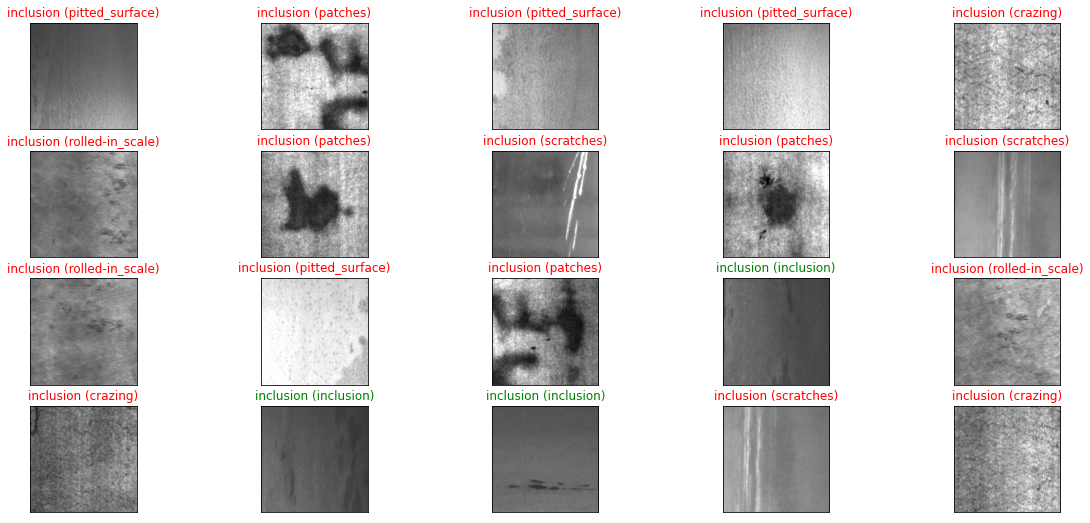

In [101]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test_one_encoded[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))